In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.integrate import solve_bvp
from scipy import stats
import random
import datetime 
from statsmodels.graphics.tsaplots import plot_acf
import statsmodels.tsa.api as smt

%matplotlib inline

# Efficient way to sample continuous price process with microstructure noise


## Bibliography 
- Yacine Ait-Sahalia, Per A. Mykland, Lan Zhang.  "*How Often to Sample a Continuous-Time Process in the Presence of Market Microstructure Noise."* The Review of Financial Studies / v 18  **2** 2005r.


### Foreword
Don't be afraid to play, edit, add anything to this notebook. Whenever you would like to test a piece of code, add a cell using the navigation bar above (**Insert**) or using keyboard shortcuts (`a` for a new cell above and `b` for below)

# Quick introduction to Python

In [2]:
# Python is a dynamically-typed language, thus there is no need specify type of a variable.
a = 1234
a -= 234
"""In Jupyter notebook, if you just write a variable name at the end of a cell, 
   its value is printed in the output cell below."""
a

1000

In [3]:
b = "Hello world"
# Use print function to print variable's represenation to the output
print(b)

Hello world


In [4]:
# You can easily swap variables with:
a, b = b, a
print('a:', a, ', b:', b)

a: Hello world , b: 1000


### Data types
Most important data types in Python are: lists, tuples and dictionaries. They all can hold a mix of various types.

In [5]:
my_list = [1, 2, 'c', ['list', 'in'], ('a', 'list')]

# Indexing starts with 0. Last element may be accessed via -1 index, second to last via -2, etc.
my_list[0] = 0
my_list[-2] = "no more a list"

# Lists are mutable, meaning they can be modified after creation 
my_list.append('new element')
my_list

[0, 2, 'c', 'no more a list', ('a', 'list'), 'new element']

In [6]:
my_tuple = (1, 2)
# On the other hand, tuples are immutable and they cannot be modified
my_tuple[1] = 3 # this line throws an exception

TypeError: 'tuple' object does not support item assignment

### Flow control statements
Available are: `if`, `for` and `while`. There is no `switch`. Take a look at the below examples.

In [7]:
for number in range(3):
    if number == 2:
        print(number, '!')
    else:
        print(number)

0
1
2 !


In [8]:
nums = [0, 2, 4, 1]
while nums:
    print(nums.pop())

1
4
2
0


### Functions
Functions are declared with the `def` keyword. Mandatory arguments come first followed by the optional ones.

In [9]:
def add_two_numbers(x, y, extra=0):
    return x + y + extra

In [10]:
add_two_numbers(3, 2)

5

In [11]:
add_two_numbers(y=2, extra=-1, x=-3)

-2

## NumPy
NumPy is a fundamental package for scientific computing in Python. It introduces a notion of NumPy's array - an object similar to the built-in list, though with a fixed size and fixed data type it holds (e.g. it cannot store numbers and strings at the same time).

In the following exercies we will familiarise you with the necessary concepts.

### Imports
Necessary Python libraries that we will use during this workshop. In Python you can load a library by writing `import library_name`. This exposes library's API within a namespace named as library, e.g. `library_name.function_name()` is used to call `function_name` that was implemented in `library_name`. A shorthand notation is to write `import library_name as ln` which exposes functions in `ln` namespace instead of its previous, longer version.

In [12]:
from samplingplot import *

# Toy Model Setting



When the prices follow a lognormal distriubution, the returns follow a normal distribution.

Log-price follows a regular Wiener process 

\begin{align*}
X_{t} =\sigma W_{t}.
\end{align*}


Data is sampled at equidistant time intervals $\Delta,$ in which case the parameter $\sigma^{2}$ is estimated at time $T$ on the basis of $K+1$ discrete observations recorded at times $$\tau_{0}=0, \ \tau_{1}=\Delta,\ldots,\tau_{K}=K\Delta=T$$ we have:

Returns are equal to:

\begin{align*}
Y_{i} & =X_{\tau_{i}}-X_{\tau_{i-1}}\\
& =\sigma\left(W_{\tau_{i}}-W_{\tau_{i-1}}\right).
\end{align*}



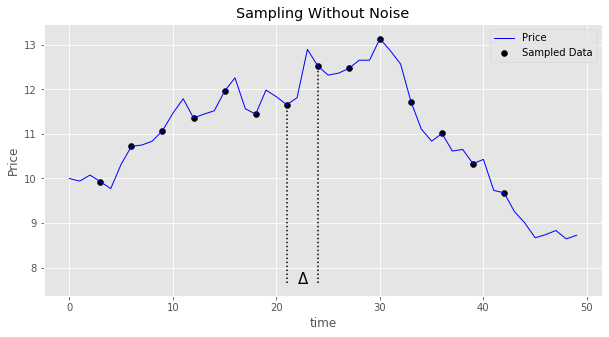

In [13]:
plot_sampling_without_noise()

## Exercise 1

simulate processes: $X_t$.

It can be done at least in two ways: 
     - iteratively  
\begin{align*}
     X[i+1]=f(X[i],\sigma, dt, \dots )
\end{align*}
     - simultainusly (without looping through the data).
Check if log-returs follow normal distribution
   

In [31]:
##for presenter only

def X_t(S0,sigma,n_steps,seed=1245):
    np.random.seed(seed)
    dt=1.0/n_steps
    S=sigma*np.sqrt(dt)*np.random.normal(0,1,size=n_steps).T
    S=S.cumsum()
    return(S)

def Xt1(S0,sigma,n_steps,seed=1245) :
        np.random.seed(seed)
        dt=1.0/n_steps
        S=[]
        S.append(S0)
        for i in range (1,n_steps):
            rand=np.random.normal(0,1)
            S.append(S[i-1]+sigma*np.sqrt(dt)*rand)
        return(S)



In [35]:
# part of the body function

def X_t(S0, sigma, n_steps , seed = 1245):
        np.random.seed(seed)
        dt = 1.0 / n_steps
        X= []
        X.append(S0)
        for i in range(1, n_steps) :
            rand = np.random.normal(0,sigma*np.sqrt(dt))
            X.append( X[-1] + rand)
        return(X)

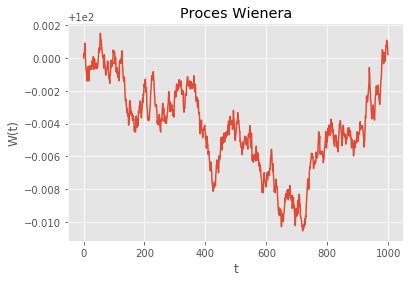

In [36]:
plt.plot(X_t(100, 0.01, 1000) ,label="")
plt.xlabel("t")
plt.ylabel("W(t)")
plt.title("Proces Wienera")
plt.show()
plt.close()

<details>
    <summary><button>Hint</button></summary>
    <p>Use <code>np.random.normal</code> with parametr <b>size</b> to generate random normal lsit of numbers, note what is the <code>scale</code> parameter.</p>
</details>


## No microstructure noise

Given Log-price process
$$X_{t}=\sigma W_{t},$$ 
 log returns are equal to
$$Y_{i}=X_{\tau_{i}}-X_{\tau_{i-1}}=\sigma\left(W_{\tau_{i}}-W_{\tau_{i-1}}\right).$$

Expected estimated variance will be 
$$E\left[\hat{\sigma}^{2}\right]=\frac{1}{T}\sum_{i=1}^{K}E[Y_{i}^{2}]=\frac{K\left(\sigma^{2}\Delta\right)}{T}=\sigma^{2}.$$
 
It is an unbiased estimator. It is also consistent as the variance of the estimator is equal to 
\begin{alignat*}{1}
var\left[\hat{\sigma}^{2}\right]= & var\left\{ \frac{1}{T}\sum_{i=1}^{K}var[Y_{i}^{2}]\right\} =\frac{1}{T^{2}}\sum_{i=1}^{K}var\left[Y_{i}^{2}\right]=\frac{K\left(2\sigma^{4}\Delta^{2}\right)}{T^{2}}=\frac{2\sigma^{4}\Delta}{T},
\end{alignat*}

Its asymptotic distribution is then 
$$T^{\frac{1}{2}}\left(\hat{\sigma}^{2}-\sigma^{2}\right)\rightarrow_{K\to\infty} \mathcal{N}\left(0,2\sigma^{4}\Delta\right).$$

Hence, sampling as often as possible is optimal for the purpose of estimating $\sigma^{2}.$




## Exercise 2
- Using the process $X_t$ try to estimate $\hat{\sigma}$ from returns. Try to show numerically, that sampling as often as for the purpose of estimating $\sigma^{2}.$
- Plot the results.



<details>
    <summary><button>Hint</button></summary>
  
    <br> Write a function that calculates volatility from the begining of dataset til time  <code>i</code> by slicing numpy array <code>X[:i]</code></br>
  
</details>


In [69]:
#volatility estimate with a 
def vol_estimate(ts,n_samples):
    n_steps=len(ts)
    ts = ts[:n_samples]
    returns = np.diff(ts) #calculate the returns
    
    sigma = np.std(returns)*np.sqrt(n_steps) #calculate sigma
    return(sigma) # return the results

def plot_vol_estimate(ts, from_n, to_n):
    
    sigma = np.array([vol_estimate(ts, i) for i in range(from_n,to_n)])
    plt.plot(sigma)
    plt.hlines(0.9, xmin=1,xmax = len(sigma))
    plt.show()

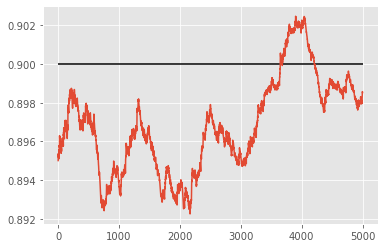

In [70]:
X = X_t(100,0.9,10000, seed=12345)

#vol_estimate(X,5000)
plot_vol_estimate(X,5000,10000)

In [76]:
# resample a dataset \
def Volatility_with_resampling(ts,k):
    n_steps = len(ts)
    ts = pd.DataFrame(ts)
    
    Temp = ts[ts.index % k == 0] # choose every nth observation
    Temp = Temp.reindex(range(n_steps)).ffill() # resample to the dataset with length as initial dataset
    
    returns = Temp.diff()
    returns = returns**2
    returns = np.sum(returns)
    sigma = np.sqrt(returns)
    return(sigma[0])

Vols=[]
for i in range(1,1000):
    Vols.append(Volatility_with_resampling(X, i))   

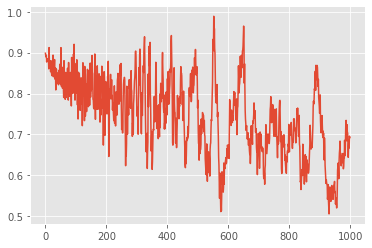

In [77]:
plt.plot(Vols)

## Realized volatility 
The purpose is to build a volatility time series from the data. The most common example is to take 5 minutes interval returns data and then use to estimate whole day standard deviation:
$$
\sigma_t=\sqrt{\frac{1}{M}\sum_{i=1}^{M}{R_{i,j}^2}},$$
$R_{i,j}$ represents a j-th minute return during day

Before we will write a function to calculate relaized volatility. We need to construct a dataset with time index instead of integer index. To work with time serieses, we will use pandas library.

## Exercise 3

- Create a pandas dataframe  with prices sampled each second from 8:00AM to 4:00PM with time index.
- Write a function *realized_volatility()*, which calculates volatility from returns sampled according to user input.


<details>
    <summary><button>Hint</button></summary>
  
    <br> Use  DataFrame from pandas library. Function  <code>resample()</code> shoudl work well</br>
  
</details>

In [80]:
def dates(start,delta,counts):
    curr = start #assign tovariable curr
    Dates = [] #create an empty list
    Dates.append(curr)
    
    while counts >= 2: #loop
        curr = curr + datetime.timedelta(seconds=delta)
        Dates.append( curr )
        counts = counts-1
    
    return(Dates)

In [78]:
def realized_volatility(ts , delta):
    ts = ts.resample(rule = (str(delta)+'s')).last( ) #use .resample to pick chosen observationss
    ts = ts.diff()
    ts = np.power(ts,2)

    return np.sqrt(np.sum(ts*1/delta))


## When the observations are noisy but the Noise is ignored

Now, let us assume that we can observe prices only with noise: $$\tilde{X}_{\tau_{i}}=X_{\tau_{i}}+U_{\tau_{i}}$$
where $U\sim \mathcal{N}\left(0,a^{2}\right).$

Data is sampled at equidistant time intervals $\Delta,$ in which case the parameter $\sigma^{2}$ is estimated at time $T$ on the
basis of $N+1$ discrete observations recorded at times $$\tau_{0}=0, \ \tau_{1}=\Delta,\ldots,\tau_{K}=K\Delta=T.$$

In that case, log-returns are
equal to:

\begin{align*}
Y_{i} & =\tilde{X}_{\tau_{i}}-\tilde{X}_{\tau_{i-1}},\\
& =X_{\tau_{i}}-X_{\tau_{i-1}}+U_{\tau_{i}}-U_{\tau_{i-1}},\\
& =\sigma\left(W_{\tau_{i}}-W_{\tau_{i-1}}\right)+U_{\tau_{i}}-U_{\tau_{i-1}.}
\end{align*}

Hence, log-returns variance and auto-covariance are equal to: 
\begin{align*}
var\left(Y_{i}\right) & =var\left[\sigma\left(W_{\tau_{i}}-W_{\tau_{i-1}}\right)+U_{\tau_{i}}-U_{\tau_{i-1}}\right]\\
& =\sigma^{2}\Delta+2a^{2}\\
cov\left(Y_{i},Y_{i-1}\right) & =E\left[\left(\sigma\left(W_{\tau_{i}}-W_{\tau_{i-1}}\right)+U_{\tau_{i}}-U_{\tau_{i-1}}\right)\left(\sigma\left(W_{\tau_{i-1}}-W_{\tau_{i-2}}\right)+U_{\tau_{i-1}}-U_{\tau_{i-2}}\right)\right]\\
& =E\left[-U_{\tau_{i-1}}U_{\tau_{i-1}}\right]=-a^{2}\\
cov\left(Y_{i},Y_{i-k}\right) & =0\text{ for any } k.
\end{align*}

We may see now that log-returns, $Y_{i}=\varepsilon_{i}-\eta\varepsilon_{i-1}$
follow an MA(1) process. In that case variance estimator is biased:
$E\left[\hat{\sigma}^{2}\right]-\sigma^{2}=\frac{2a^{2}}{\Delta}$
and $var\left[\hat{\sigma}^{2}\right]$ does not converge to 0 for
$\Delta\rightarrow0.$ Actually, looking at $var\left(Y_{i}\right)=\sigma^{2}\Delta+2a^{2}$
we see that $\mathbf{\pi}=\frac{2a^{2}}{\sigma^{2}\Delta+2a^{2}}\rightarrow1\text{ as } \Delta\rightarrow0$
that is the micro-structure noise starts to dominate.


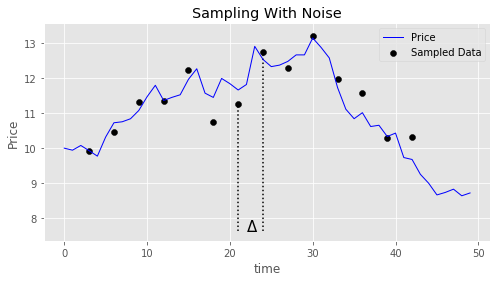

In [81]:
plot_sampling_with_noise()

In [82]:
S1 = X.copy()
S1['Price'] = S1['Price']+np.random.normal( ) #add a random  noise

NameError: name 'S' is not defined

As we may see, when noise is present, sampling as often as possible might not be the best idea.

## How to detect microstructure noise

We will  try to calculate volatility on a five minutes intervals
- We can calculate autocorrelation, when autocorrelation at first lag is huge and negative it might suggests the presence of microstructure noise

In [ ]:
S_noise['return'] = 
S['return'] =


fig1, ax = plt.subplots(1,2, figsize=(12,4), sharex=True,sharey=True)

plot_acf(_,ax=ax[0],title="Without microstructure noise")
plot_acf(_,ax=ax[1],title="With microstructure noise")
y_value=['{:,.2f}'.format(x*100) + '%' for x in ax[1].get_yticks()]
ax[1].set_yticklabels(y_value)

ax[0].set_xlabel("Lag")
ax[1].set_xlabel("Lag")
plt.tight_layout()
plt.show()



In [ ]:
time_series_plot( _ )
time_series_plot( _ )


## MA(1)

In [ ]:
from statsmodels.tsa.arima_model import ARMA

model=ARMA(_,order=_).fit(method=_)
muMLE=model.params[0]
etaMLE=model.params[1]


In [ ]:
print(etaMLE,muMLE)

In [ ]:
S2=S1['ret'].shift(_)-thetaMLE*S1['ret']
plot_acf(_,title="Resampled data with microstructure noise")
plt.show()
plt.close()


# Disclaimer

This presentation has been prepared by HSBC Service Delivery (Polska) sp. z o.o. with a registered office located at Kapelanka 42A, 30-347 Krakow, Poland, registered in the District Court for Kraków-Śródmieście in Kraków, XI Commercial Division of the National Court Register, under the number KRS 0000310459, share capital (entirely paid) in the amount of 67 689 500,00 PLN, NIP 525-242-91-07, hereinafter referred to as “HSBC”. 
 
HSBC has based this document on information obtained from sources it believes to be reliable but which has not been independently verified. While this information has been prepared in good faith, no representation or warranty, express or implied, is or will be made and no responsibility or liability is or will be accepted by the HSBC, or by any of their respective officers, employees or agents in relation to the accuracy or completeness of the Documents or any other written or oral information made available to any interested party or its advisers and any such liability is expressly disclaimed. Any charts and graphs included are from publicly available sources or proprietary data. No liability is accepted whatsoever for any direct, indirect or consequential loss arising from the use of this document. HSBC is under no obligation to keep current the information in this document.  You are solely responsible for making your own independent appraisal of and investigations into the data, products, financial instruments and transactions referred to in this document and you should not rely on any information in this document as constituting investment advice. Neither HSBC nor any of its affiliates are responsible for providing you with legal, tax or other specialist advice and you should make your own arrangements in respect of this accordingly. The issuance of and details contained in this document, which is not for public circulation, does not constitute an offer or solicitation for, or advice that you should enter into, the purchase or sale of any security, commodity or other financial instrument or master agreement, or any other contract, agreement or structure whatsoever.  This document is intended to be distributed in its entirety. Reproduction of this document, in whole or in part, or disclosure of any of its contents, without prior consent of HSBC or any associate, is prohibited. 


 <div style="text-align: center; color: #db0011; font-family: Arial, sans-serif; 
            font-size: 30pt; height: 500px; line-height: 500px">
    Together we thrive   
</div>

<div style="text-align: left">
    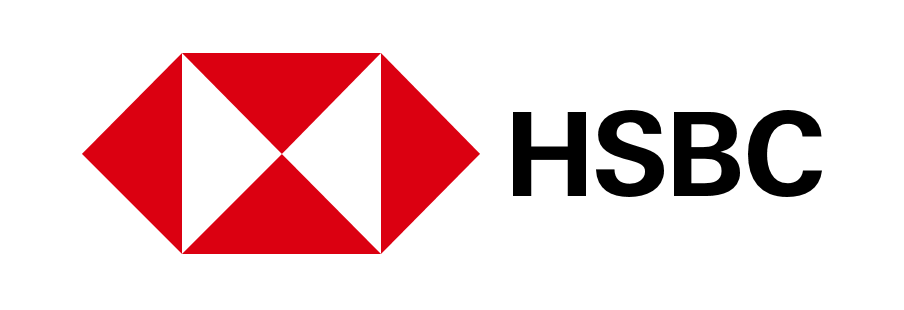
</div>